In [25]:
from pandas import DataFrame
from sklearn.utils import shuffle
import os
import concurrent
import requests
import pandas as pd
from nbdev.showdoc import *
from fastcore.test import *
from sklearn.preprocessing import MultiLabelBinarizer

In [26]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot

import json

In [3]:
api_key = "785475a69770b7dc1afQ964feff948dd7"

In [27]:
data = pd.read_csv('train.csv')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             916 non-null    int64  
 1   adult                  916 non-null    bool   
 2   backdrop_path          901 non-null    object 
 3   belongs_to_collection  269 non-null    object 
 4   budget                 916 non-null    int64  
 5   genres                 916 non-null    object 
 6   homepage               260 non-null    object 
 7   id                     916 non-null    int64  
 8   imdb_id                916 non-null    object 
 9   original_language      916 non-null    object 
 10  original_title         916 non-null    object 
 11  overview               916 non-null    object 
 12  popularity             916 non-null    float64
 13  poster_path            916 non-null    object 
 14  production_companies   916 non-null    object 
 15  produc

In [6]:
valid = pd.read_csv('valid.csv')

In [12]:
def drop_col(data: DataFrame)->DataFrame:
        
        df = data.drop(['belongs_to_collection','homepage','imdb_id','production_companies','popularity','original_language','original_title','revenue','runtime','spoken_languages','status','video','vote_average','vote_count','production_countries','budget'],axis = 1)
        df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
        df =df.drop(df.columns[0], axis=1)
        
        return df

In [7]:
def clean_genre(df:DataFrame)-> DataFrame:
    
    mlb = MultiLabelBinarizer(sparse_output=True)
    df['genres'] = [[x['name'] for x in eval(list_dict)] for list_dict in df['genres']]
    df1 = df.join(
                pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('genres')),
                index=df.index,
                columns=mlb.classes_))
    return df1

In [29]:
data['genres']

0      [{'id': 10751, 'name': 'Family'}, {'id': 35, '...
1      [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
2      [{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...
3      [{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...
4      [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
                             ...                        
911    [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...
912    [{'id': 10770, 'name': 'TV Movie'}, {'id': 12,...
913    [{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...
914                        [{'id': 18, 'name': 'Drama'}]
915    [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...
Name: genres, Length: 916, dtype: object

In [8]:
def extract_backdrop_img(df:DataFrame):
    
    try:
        os.makedirs(".\\backdrop_img")
    except FileExistsError:
    # directory already exists
        pass
    
    for cnt,x in enumerate(df['backdrop_path']):
        
        if x is not None:
            response = requests.get("https://image.tmdb.org/t/p/original"+str(x))
            file = open(".\\backdrop_img\\"+str(df['id'][cnt])+".jpg", "wb")
            file.write(response.content)
            file.close()
    
    return
    

In [9]:
def extract_poster_img(df:DataFrame):
    
    try:
        os.makedirs(".\\poster_img")
    except FileExistsError:
    # directory already exists
        pass
    
    for cnt,x in enumerate(df['poster_path']):
        
        if x is not None:
            response = requests.get("https://image.tmdb.org/t/p/original"+str(x))
            file = open(".\\poster_img\\"+str(df['id'][cnt])+".jpg", "wb")
            file.write(response.content)
            file.close()
    
    return
  

In [30]:
df = drop_col(data)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   adult          916 non-null    bool          
 1   backdrop_path  901 non-null    object        
 2   genres         916 non-null    object        
 3   id             916 non-null    int64         
 4   overview       916 non-null    object        
 5   poster_path    916 non-null    object        
 6   release_date   916 non-null    datetime64[ns]
 7   tagline        916 non-null    object        
 8   title          916 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(6)
memory usage: 58.3+ KB


In [31]:
df1 = clean_genre(df)

In [39]:
df1['Romance'].value_counts()

0    725
1    191
Name: Romance, dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype           
---  ------           --------------  -----           
 0   adult            916 non-null    bool            
 1   backdrop_path    901 non-null    object          
 2   id               916 non-null    int64           
 3   overview         916 non-null    object          
 4   poster_path      916 non-null    object          
 5   release_date     916 non-null    datetime64[ns]  
 6   tagline          916 non-null    object          
 7   title            916 non-null    object          
 8   Action           916 non-null    Sparse[int32, 0]
 9   Adventure        916 non-null    Sparse[int32, 0]
 10  Animation        916 non-null    Sparse[int32, 0]
 11  Comedy           916 non-null    Sparse[int32, 0]
 12  Crime            916 non-null    Sparse[int32, 0]
 13  Documentary      916 non-null    Sparse[int32, 0]
 14  Drama     

<AxesSubplot:ylabel='adult,backdrop_path,id,overview,poster_path,release_date,tagline,title'>

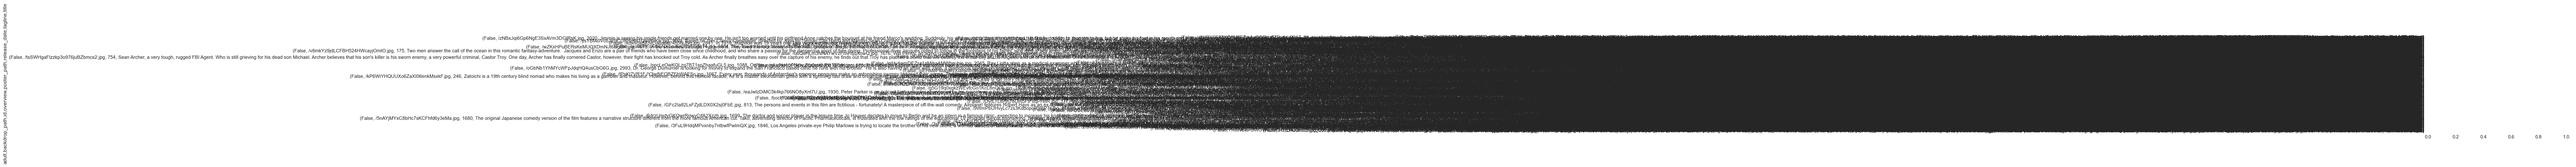

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype           
---  ------           --------------  -----           
 0   adult            916 non-null    bool            
 1   backdrop_path    901 non-null    object          
 2   id               916 non-null    int64           
 3   overview         916 non-null    object          
 4   poster_path      916 non-null    object          
 5   release_date     916 non-null    datetime64[ns]  
 6   tagline          916 non-null    object          
 7   title            916 non-null    object          
 8   Action           916 non-null    Sparse[int32, 0]
 9   Adventure        916 non-null    Sparse[int32, 0]
 10  Animation        916 non-null    Sparse[int32, 0]
 11  Comedy           916 non-null    Sparse[int32, 0]
 12  Crime            916 non-null    Sparse[int32, 0]
 13  Documentary      916 non-null    Sparse[int32, 0]
 14  Drama     